## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la Computación
## Carrera: Ingeníeria en Computación Inteligente
### Curso: Metaheuristicas I
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumnos: 
### Dante Alejandro Alegria Romero
### Diego Alberto Aranda Gonzalez
### Andrea Margarita Balandran Felix
### Diego Emilia Moreno Sanchez
### Semestre: Agosto_Diciembre del 2024"


## Práctica No. 3: Optimización por Enjambre de Partículas (PSO)

#### PSO es un algoritmo de optimización inspirado en el comportamiento social de grupos de organismos, como bandadas de aves o bancos de peces. En esta práctica, implementamos PSO para simular la planificación de carga de 100,000 críticas de cine. Evaluaremos el rendimiento del sistema comparando el tiempo de ejecución secuencial frente al tiempo de ejecución en paralelo, utilizando 8 procesadores homogéneos. Además, presentaremos una tabla y un gráfico que ilustran la eficiencia de carga balanceada entre los procesadores.

### PASO 1: LIBRERIAS

In [12]:
import numpy as np
import pyswarms as ps
import json
import matplotlib.pyplot as plt
import pandas as pd

### Paso 2: Cargar los datos del JSON
 cargamos los datos desde un archivo JSON llamado reviews.json. Extraemos los tiempos de procesamiento de cada tarea y los almacenamos en un arreglo de numpy, lo que facilita su manipulación y cálculo.

In [13]:
# Load data from JSON
with open("reviews.json") as file:
    tasks = json.load(file)

# Extract processing times
processing_times = np.array([task["time"] for task in tasks])

### Paso 3: Inicializar parámetros
Definimos el número de procesadores disponibles (en este caso, 8) y calculamos el total de tareas a partir del tamaño del arreglo processing_times.

In [14]:
num_processors = 8

# PSO parameters
num_particles = 30
num_iterations = 10

# PSO parameters
w = 0.5  # inertia weight
c1 = 1  # cognitive parameter
c2 = 2  # social paramete

### Paso 4: Definir la función de fitness
La función fitness evalúa una asignación de tareas a procesadores. Primero, aseguramos que las tareas estén asignadas a procesadores válidos. Luego, calculamos la carga de cada procesador sumando los tiempos de procesamiento de las tareas asignadas. Finalmente, devolvemos la carga máxima de cualquier procesador, que será minimizada por el PSO.

In [15]:
# Fitness function
def calculate_fitness(particle, times):
    loads = np.zeros(num_processors)
    for task, processor in enumerate(particle):
        loads[processor] += times[task]
        # no retornar el maximo de loads, sino la suma de los loads
    return np.min(loads)

### Paso 5: Definir la función de PSO

In [16]:
# PSO function
def run_pso(times):
    num_tasks = len(times)
    particles = np.random.randint(0, num_processors, size=(num_particles, num_tasks))
    personal_best_positions = particles.copy()
    personal_best_fitness = np.full(num_particles, np.inf)
    global_best_position = particles[0].copy()
    global_best_fitness = np.inf
    velocities = np.zeros_like(particles, dtype=float)

    for _ in range(num_iterations):
        fitness = np.array([calculate_fitness(p, times) for p in particles])
        improved = fitness < personal_best_fitness
        personal_best_positions[improved] = particles[improved]
        personal_best_fitness[improved] = fitness[improved]
        if np.min(fitness) < global_best_fitness:
            global_best_index = np.argmin(fitness)
            global_best_position = particles[global_best_index].copy()
            global_best_fitness = fitness[global_best_index]
        r1, r2 = np.random.rand(2, num_particles, num_tasks)
        velocities = (
            w * velocities
            + c1 * r1 * (personal_best_positions - particles)
            + c2 * r2 * (global_best_position - particles)
        )
        particles = np.clip(particles + velocities.astype(int), 0, num_processors - 1)
        print(f"Iteration: {_ + 1}, Best Fitness: {global_best_fitness}")

    return global_best_position, global_best_fitness

### Paso 6: Definir la función de Process Batches 

In [17]:
# Function to process batches
def process_batch(batch_size):
    times = processing_times[:batch_size]
    best_assignment, parallel_time = run_pso(times)
    sequential_time = np.sum(times)
    return sequential_time, parallel_time

### Paso 7: Definimos los lotes de procesamiento
(10,000 - 20,000 - 30,000 - ... - 100,000), criticas de cine

In [18]:
batch_sizes = range(10000, 110000, 10000)
results = []

for batch_size in batch_sizes:
    sequential_time, parallel_time = process_batch(batch_size)
    results.append(
        {
            "Batch Size": batch_size,
            "Sequential Time": sequential_time,
            "Parallel Time": parallel_time,
            "Speedup": sequential_time / parallel_time,
        }
    )

Iteration: 1, Best Fitness: 2.3549880981445312
Iteration: 2, Best Fitness: 2.0431530475616455
Iteration: 3, Best Fitness: 1.7004830837249756
Iteration: 4, Best Fitness: 1.516397476196289
Iteration: 5, Best Fitness: 1.229126214981079
Iteration: 6, Best Fitness: 1.0997607707977295
Iteration: 7, Best Fitness: 1.0100038051605225
Iteration: 8, Best Fitness: 0.8936657905578613
Iteration: 9, Best Fitness: 0.8149375915527344
Iteration: 10, Best Fitness: 0.778679370880127
Iteration: 1, Best Fitness: 4.788766145706177
Iteration: 2, Best Fitness: 4.313345432281494
Iteration: 3, Best Fitness: 3.5661330223083496
Iteration: 4, Best Fitness: 3.1505916118621826
Iteration: 5, Best Fitness: 2.7357046604156494
Iteration: 6, Best Fitness: 2.2874159812927246
Iteration: 7, Best Fitness: 2.0936288833618164
Iteration: 8, Best Fitness: 1.9150128364562988
Iteration: 9, Best Fitness: 1.811877727508545
Iteration: 10, Best Fitness: 1.768953800201416
Iteration: 1, Best Fitness: 7.206308603286743
Iteration: 2, Best 

### Paso 8: Creamos el DataFrame

In [19]:
df = pd.DataFrame(results)

### Paso 9: Imprimimos la tabla

In [20]:
print(df.to_string(index=False))

 Batch Size  Sequential Time  Parallel Time   Speedup
      10000        20.729685       0.778679 26.621592
      20000        41.209816       1.768954 23.296152
      30000        61.719953       2.700603 22.854142
      40000        82.366505       4.031514 20.430661
      50000       103.081851       4.766106 21.628109
      60000       123.811536       5.779366 21.423032
      70000       144.291667       6.930123 20.820938
      80000       164.801804       7.475535 22.045486
      90000       185.448356       8.584536 21.602607
     100000       206.163702       9.872480 20.882667


### Paso 10: Crear la Grafica

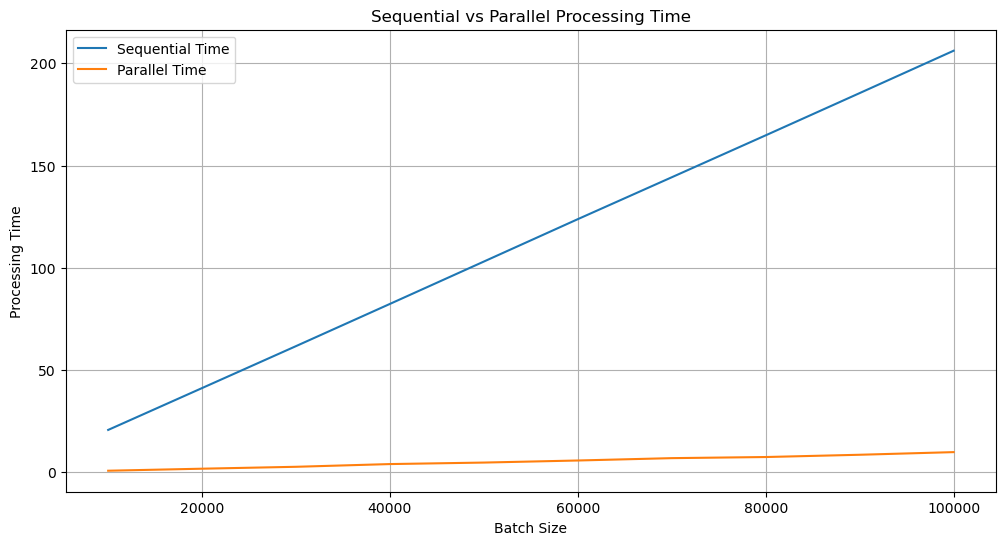

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df["Batch Size"], df["Sequential Time"], label="Sequential Time")
plt.plot(df["Batch Size"], df["Parallel Time"], label="Parallel Time")
plt.xlabel("Batch Size")
plt.ylabel("Processing Time")
plt.title("Sequential vs Parallel Processing Time")
plt.legend()
plt.grid(True)
plt.show()

### Paso 11: Crear la grafica de aceleración

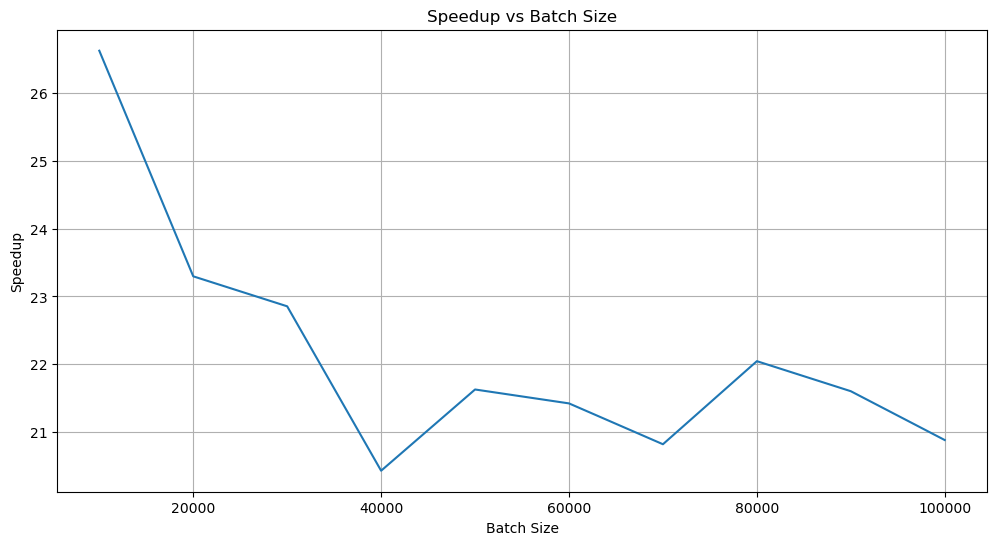

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df["Batch Size"], df["Speedup"])
plt.xlabel("Batch Size")
plt.ylabel("Speedup")
plt.title("Speedup vs Batch Size")
plt.grid(True)
plt.show()